In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test  = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

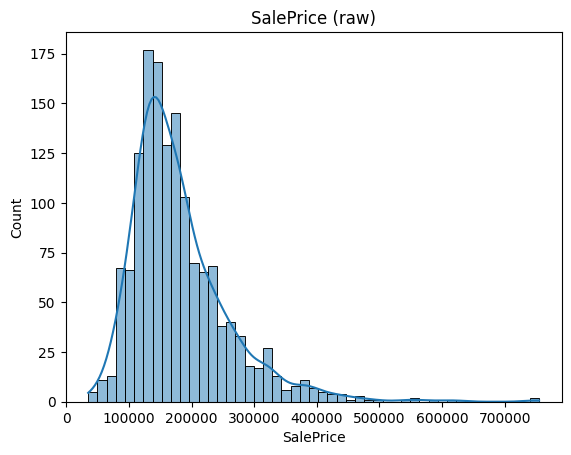

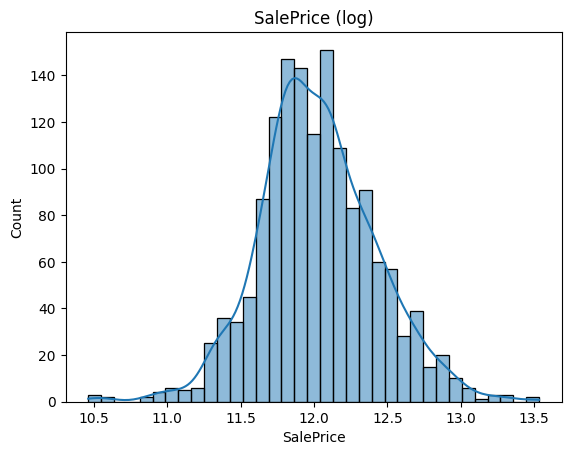

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train["SalePrice"], kde=True)
plt.title("SalePrice (raw)")
plt.show()

sns.histplot(np.log1p(train["SalePrice"]), kde=True)
plt.title("SalePrice (log)")
plt.show()

In [9]:
missing = (
    train.isnull().mean()
    .sort_values(ascending=False)
)

missing.head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

In [10]:
numeric_cols = train.select_dtypes(include=["int64","float64"])
corr = numeric_cols.corr()["SalePrice"].sort_values(ascending=False)

corr.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

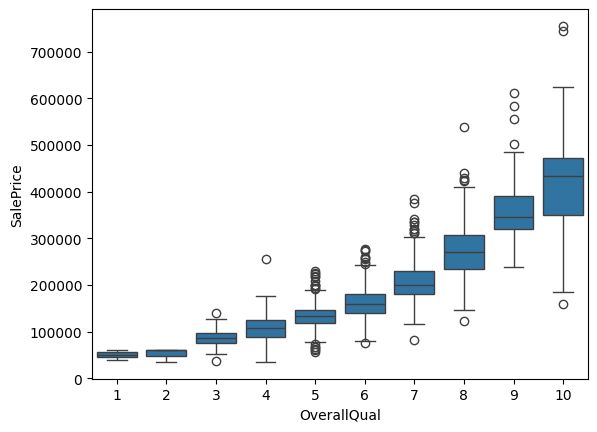

In [11]:
sns.boxplot(
    data=train,
    x="OverallQual",
    y="SalePrice"
)
plt.show()